# SI 618: Data Manipulation and Analysis
## 05 - Data analysis II: ANOVA, t-test, linear models

### Dr. Chris Teplovs, School of Information, University of Michigan
<small><a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a> This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.


## Visualization for Data Scientists

We're going to ask a special virtual guest lecturer to provide some background on data visualization.  Together, we'll watch [a brief (8-minute video) by Dr. Chris Brooks](
https://www.coursera.org/learn/python-plotting/lecture/qrqqa/tools-for-thinking-about-design-alberto-cairo)
and pause it several times to answer the following questions:



## <font color="magenta">Q1a: As someone who is studying data science, who are you trying to reach through your visualizations?  </font>


professors and classmates, lots of stakeholders. 

## <font color="magenta">Q1b: What sense can you make of this image?</font>
![](resources/BrooksResearch.png)


Adjusted grade distributin is not symmetric and so is it for capters accessed percentage. 
It seems there is heavy density in the left botoom and right upper. It means once people cross the red lien, most of them have higher grade.  

## <font color="magenta">Q1c: How many different kinds of information can you see in the Minard graphic, and what are they?</font>

![](resources/Menard.png)

citeis names, populatiosn of citeis, tempetures of each city. 


## Returning to Seaborn: 

https://seaborn.pydata.org/examples/index.html

Take a look at the different visualizations that are possible.

## <font color="magenta">Q2a: Provide the title, description, and URL of one of the visualizations that you find particularly interesting and explain why you find it interesting.  </font>

url: https://seaborn.pydata.org/examples/hexbin_marginals.html

it looks really cool. As it indicates where most of the population lay in the axis. 

## <font color="magenta">Q2b: Given what we learned from Prof. Brooks, indicate 1-3 axes from Cairo's Visual Wheel where your chosen Seaborn visualization would likely score highly. Explain why.</font>

![](resources/CairoVisualWheel.png)

(replace this with your response)

## Seaborn versus Matplotlib
* Matplotlib
     * Low-level, basis for many packages
     * Painful to construct certain graphs
     * Not Pandas friendly
     * Not interactive
* Seaborn
     * Pandas friendlier
     * Great for some stats plots


## Part 1: Iris dataset
![](resources/iris.png)

In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Remember our distplots:


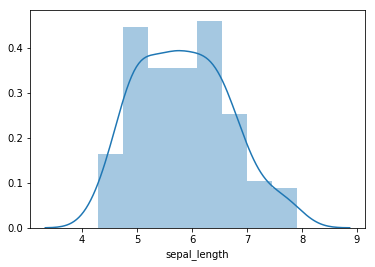

In [3]:
sns.distplot(df.sepal_length)

## <font color="magenta"> Q3: Create similar plots for the other three numeric variables in the dataset. In a couple of sentences, describe each of the plots.  </font>

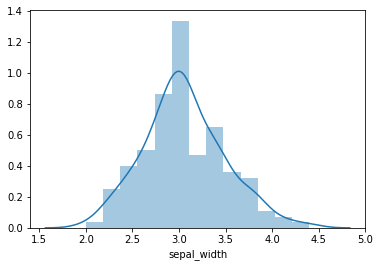

In [16]:
sns.distplot(df.sepal_width)

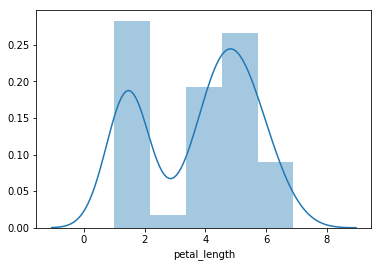

In [17]:
sns.distplot(df.petal_length)

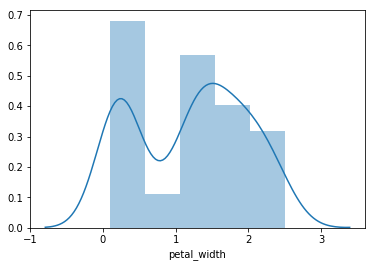

In [18]:
sns.distplot(df.petal_width)

Speal width seems to be more normal than others, with a symmetric trend. But for other distributiosn, they are not symmetric and they seems has a downward in teh middle of the range.

We often want to see how variables vary with each other.  We'll get into the details 
in a few classes, but for now let's examine them visually.  In seaborn, we do this using 
the jointplot(). So, for example, if we wanted to look at the relationship between the
distributions of sepal_length and sepal_width, we could do something like:



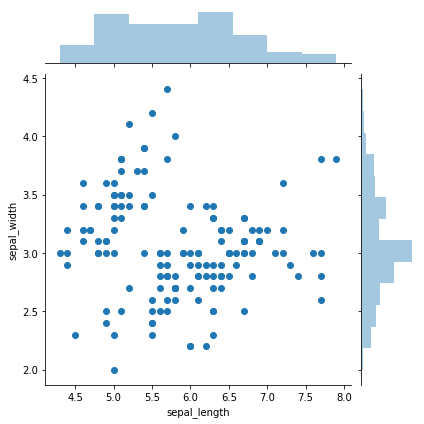

In [7]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df)

## <font color="magenta"> Q4: It's a bit difficult to see where the interesting areas in the plot are, so it's worth trying a hexbin plot.  Go ahead and copy the above  code block and add ```kind="hex"``` to the jointplot parameters. In a couple of sentences, describe what stands out to you about the visualization. </font>

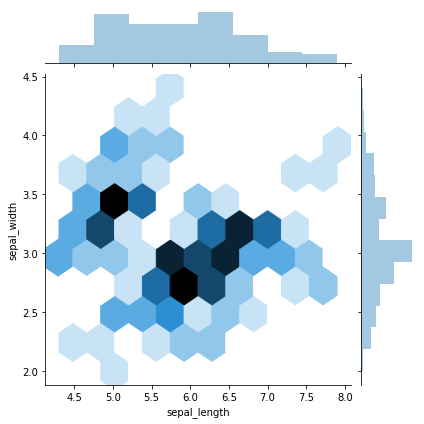

In [8]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df, kind = 'hex')

Dark color means the higher density in that area. Usually sepal length will range betweeen 5-7 and speal width will between 2.5 to 3.5. 

Now, take a look at what happens when you set ```kind="kde"```

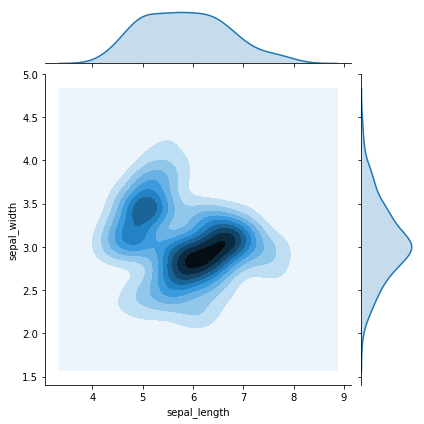

In [11]:
sns.jointplot(x='sepal_length',y='sepal_width',data=df,kind="kde")

Finally, you may want to look at all the numeric variables in your
dataset. Use ```pairplot``` to do this:


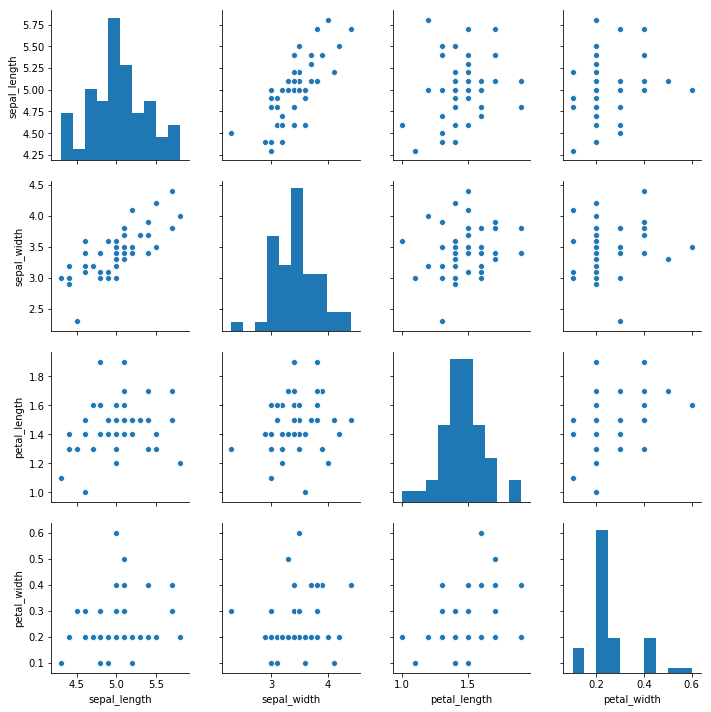

In [12]:
sns.pairplot(df.query("species == 'setosa'")) # df.query: filter your dateset, same way as filtering,  opsite type of " '' "

We can get fancier by using a different column to set the color (or "hue"):

Try running the following code:

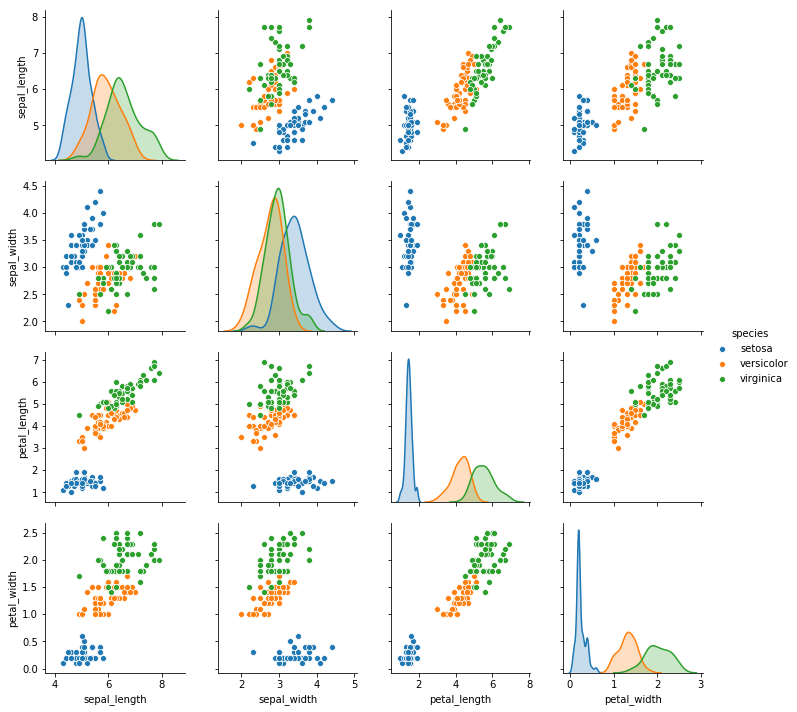

In [13]:
sns.pairplot(df,hue="species")

Now let's introduce some correlations.  We're not going to spend time on learning about the 
theory behind correlation, as you've done that in the statistics prerequisite for this course.
Instead, we're going to jump right in and annotate a graph with a lot of statistical information:

In [14]:
from scipy import stats

/anaconda2/envs/python3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


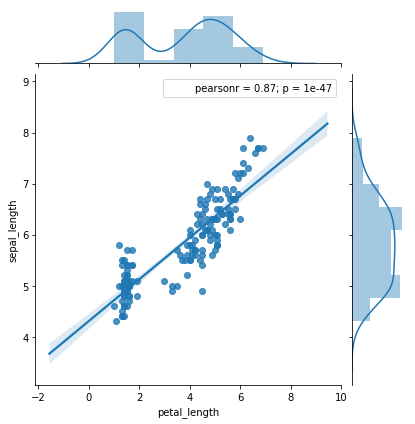

In [15]:
# ignore the warning about deprecated annotation
g = sns.JointGrid(data=df,x='petal_length',y='sepal_length')
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

Think about what the different components mean.  We'll return to using this in the next section on Wine Quality.

## Part 2: Wine quality
![](resources/vinho.png)
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/home

In [19]:
import pandas as pd
import seaborn as sns
import numpy as np

In [21]:
wine = pd.read_csv('data/winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
wine['isgood'] = np.where(wine['quality'] > 5, 'good','bad') # where: some kind of if else statement : > 5: good, <= 5 : bad
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isgood
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


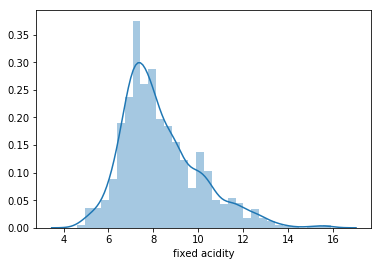

In [26]:
# This will yield a warning if you're using python >= 3.7 and scipy < 1.2
#   For now, I suggest ignoring the warning
#   For a more detailed explanation, please see https://stackoverflow.com/questions/52594235/futurewarning-using-a-non-tuple-sequence-for-multidimensional-indexing-is-depre

sns.distplot(wine['fixed acidity'])

## <font color="magenta">Q5: Create a pairplot for the wine dataset that plots 'good' and 'bad' wines in different hues. In a couple of sentences, describe interesting relationships shown by the visualization.  

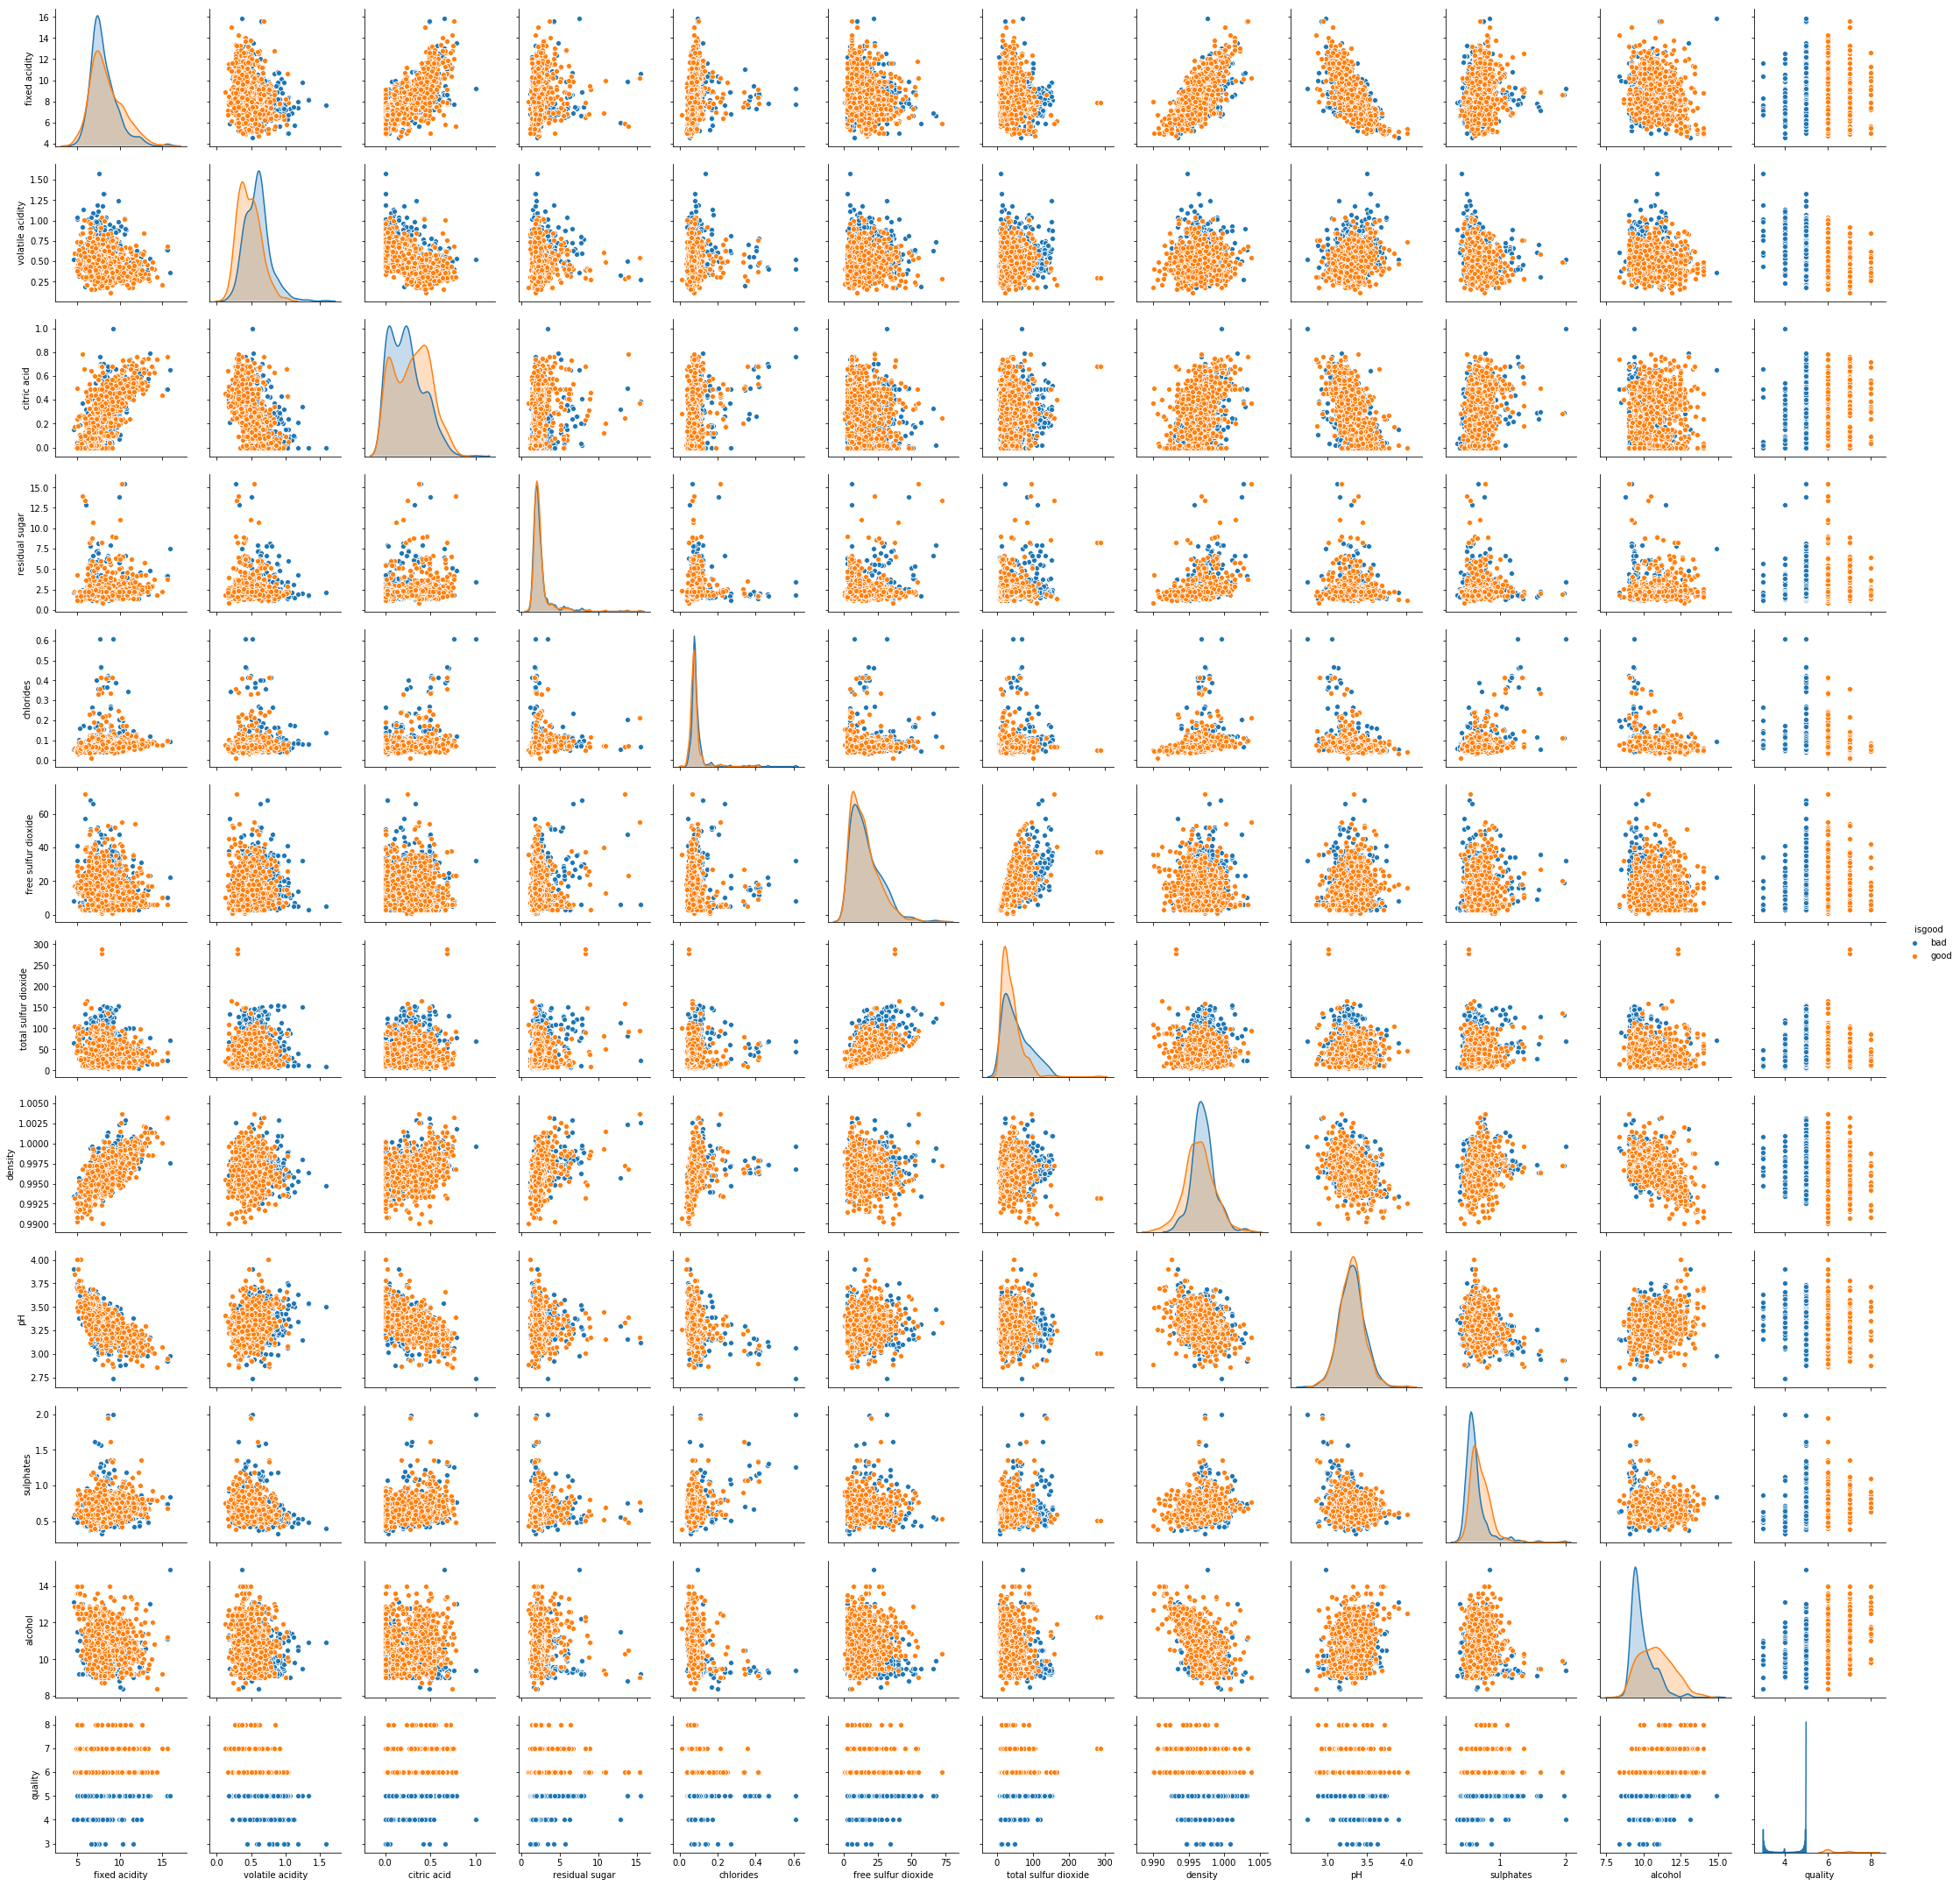

In [27]:
sns.pairplot(wine,hue="isgood")

fixed acidity has right skewed distributin and it is correlated with citric aid, density and PH. PH data seems to have a similiear distribution with normal. 

## T-test

A t-test is a simple statistical model that's commonly used to test whether the means of two different
distributions are the same.  scipy.stats gives us a handy interface for this:

In [28]:
goodwines = wine.query('isgood == "good"')
badwines = wine.query('isgood == "bad"')

In [29]:
stats.ttest_ind(wine[wine.isgood == 'good']['fixed acidity'],wine[wine.isgood == 'bad']['fixed acidity'])

Ttest_indResult(statistic=3.817471367791021, pvalue=0.00013997664808333373)

In [30]:
stats.ttest_ind(goodwines['fixed acidity'],badwines['fixed acidity']) # same

Ttest_indResult(statistic=3.817471367791021, pvalue=0.00013997664808333373)

Say if two groups are significant different between good one and bad ones

## <font color="magenta">Q6: Using the JointGrid approach we used above look at the relationship between sulphates and chlorides.  What patterns do you see?

/anaconda2/envs/python3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


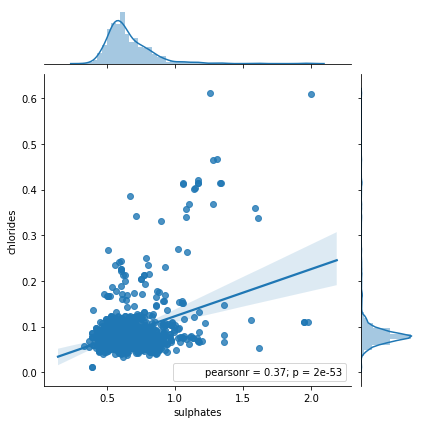

In [31]:
g = sns.JointGrid(data=wine,x='sulphates',y='chlorides')
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

It seems the relationship between sulphates and chlorides is strong, as the pearson correlation = 0.37 is quite big and p-value is small. 
But this conslusion is not supported by the data points above the reg line when sulphares are larger than 1.25. It is a heavier tail. 
Therefore, we might not convince that they have strong positive relaionship. 

## Ordinary Least Squares (OLS) Regression

We can get a lot more detail about the regression model by using statsmodels

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

statsmodels.formula.api allows you to use R-Style formulas: y ~ x1 + x2 + x3 + ...

1. y represents the outcome/dependent variable
2. x1, x2, x3, etc represent explanatory/independent variables 

In [33]:
model1 = smf.ols('chlorides ~ sulphates', data=wine).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              chlorides   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     255.3
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.99e-53
Time:                        19:04:39   Log-Likelihood:                 2737.1
No. Observations:                1599   AIC:                            -5470.
Df Residuals:                    1597   BIC:                            -5459.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0196      0.004      4.475      0.000       0.011       0.028
sulphates      0.1031      0.006     15.978      0.000       0.090       0.116
==============================================================================
Omnibus:                     1419.606   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51655.663
Skew:                           4.079   Prob(JB):                         0.00
Kurtosis:                      29.622   Cond. No.                         8.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interesting things happen when we use OLS to do an ANOVA (look closely at the model):

In [37]:
model2 = smf.ols('chlorides ~ C(isgood)', data=wine).fit() # given a categorical variable
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              chlorides   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     19.38
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.14e-05
Time:                        19:15:22   Log-Likelihood:                 2628.2
No. Observations:                1599   AIC:                            -5252.
Df Residuals:                    1597   BIC:                            -5242.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0930      0.002     54.200      0.000       0.090       0.096
C(isgood)[T.good]    -0.0103      0.002     -4.402      0.000      -0.015      -0.006
==============================================================================
Omnibus:                     1776.944   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           121109.713
Skew:                           5.649   Prob(JB):                         0.00
Kurtosis:                      44.111   Cond. No.                         2.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
aov_table = sm.stats.anova_lm(model2, typ=2)
print(aov_table)

             sum_sq      df          F    PR(>F)
C(isgood)  0.042438     1.0  19.378659  0.000011
Residual   3.497360  1597.0        NaN       NaN


### We might want to experiment with the original ```quality``` variable, either in a regression model:

In [36]:
model3 = smf.ols('chlorides ~ quality', data=wine).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              chlorides   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     26.99
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           2.31e-07
Time:                        19:13:14   Log-Likelihood:                 2631.9
No. Observations:                1599   AIC:                            -5260.
Df Residuals:                    1597   BIC:                            -5249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1298      0.008     15.765      0.000       0.114       0.146
quality       -0.0075      0.001     -5.195      0.000      -0.010      -0.005
==============================================================================
Omnibus:                     1776.366   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           120907.596
Skew:                           5.646   Prob(JB):                         0.00
Kurtosis:                      44.076   Cond. No.                         41.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### or in an ANOVA (again, look closely at the model):

In [38]:
model4 = smf.ols('chlorides ~ C(quality)', data=wine).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              chlorides   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     6.036
Date:                Mon, 18 Feb 2019   Prob (F-statistic):           1.53e-05
Time:                        19:16:06   Log-Likelihood:                 2633.5
No. Observations:                1599   AIC:                            -5255.
Df Residuals:                    1593   BIC:                            -5223.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1225      0.015      8.295      0.000       0.094       0.151
C(quality)[T.4]    -0.0318      0.016     -1.976      0.048      -0.063      -0.000
C(quality)[T.5]    -0.0298      0.015     -2.001      0.046      -0.059      -0.001
C(quality)[T.6]    -0.0375      0.015     -2.523      0.012      -0.067      -0.008
C(quality)[T.7]    -0.0459      0.015     -3.034      0.002      -0.076      -0.016
C(quality)[T.8]    -0.0541      0.018     -2.935      0.003      -0.090      -0.018
==============================================================================
Omnibus:                     1784.926   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124552.412
Skew:                           5.683   Prob(JB):                         0.00
Kurtosis:                      44.717   Cond. No.                         36.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
aov_table = sm.stats.anova_lm(model4, typ=2)
print(aov_table)

              sum_sq      df         F    PR(>F)
C(quality)  0.065812     5.0  6.035639  0.000015
Residual    3.473986  1593.0       NaN       NaN


## <font color="magenta">Q7: Use OLS to perform either a regression or an ANOVA on a variable (other than chlorides) and interpret your results.

In [56]:
# insert your code here
# model5 = smf.ols('pH ~ C(isgood)', data=wine).fit()
# model5.summary()

model5 = smf.ols('pH ~ Q("total sulfur dioxide")', data=wine).fit()
model5.summary()
# 'pH ~ Q("total sulfur dioxide")'

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pH   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.093
Date:                Mon, 18 Feb 2019   Prob (F-statistic):            0.00782
Time:                        19:28:15   Log-Likelihood:                 722.57
No. Observations:                1599   AIC:                            -1441.
Df Residuals:                    1597   BIC:                            -1430.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     3.3256      0.007    498.532      0.000       3.313       3.339
Q("total sulfur dioxide")    -0.0003      0.000     -2.663      0.008      -0.001   -8.22e-05
==============================================================================
Omnibus:                       35.332   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.779
Skew:                           0.200   Prob(JB):                     7.72e-13
Kurtosis:                       3.823   Cond. No.                         98.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By calculating the reg between pH and total sulfur dioxide, the slop of categorical variable is significant as the p-value = 0.008 < 0.05. 

## Part 3:  Airplane Crashes and Fatalities
The next dataset we are going to look at is the full history of airplane crashes throughout the world, from 1908-2009.  It's taken from:

https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq

In [51]:
import pandas as pd
import seaborn as sns

We've provided the CSV file for this lab so you can go ahead and load it in the usual way:

In [52]:
crashes = pd.read_csv('data/Airplane_Crashes_and_Fatalities_Since_1908.csv')

As always, you should take a look at the data to get a sense of 
what it's like:

In [53]:
crashes.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


As we mentioned in an earlier class, pandas is really good at helping
us deal with dates.  The 'Date' column in the dataframe contains 
strings that look like dates.  We can use the ```pandas.to_datetime()``` function to convert the strings to an internal datetime object
(see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html for more details):

In [57]:
crashes['Date'] = pd.to_datetime(crashes['Date'])

And let's look at the dataframe again.  See any difference?

In [58]:
crashes.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


The pandas datetime object makes it easy to extract interesting 
parts of the date or time.  In our case, we're interested in extracting
the year, so we can do that with the following code:

In [59]:
crashes['year'] = crashes['Date'].dt.year # .dt.year : pull out the year 

And, as always, let's look at what we got:

In [60]:
crashes.year.head()

0    1908
1    1912
2    1913
3    1913
4    1913
Name: year, dtype: int64

As part of the final exercise in this class, let's create a 
visualization of the number of Fatalities per year:

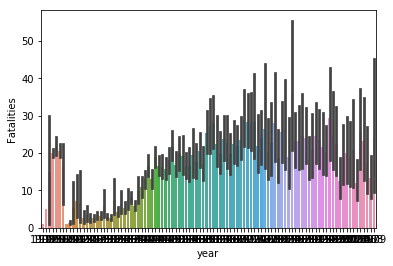

In [62]:
sns.barplot('year','Fatalities',data=crashes)

That doesn't look great, does it?  


## <font color="magenta">Q8: Create a barplot of the number of fatalities per decade and describe the results. 

Go ahead and create a new column called 'decade' 
that represents the decade for each year.  Remember that an integer divide (a.k.a. a floor divide) can be
done with the // operator.

What's the trend in airplane crash fatalities?

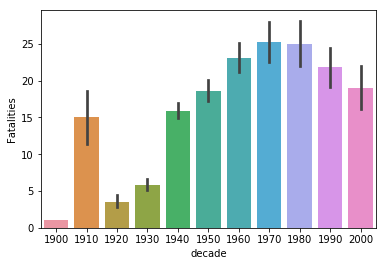

In [72]:
crashes['decade'] = crashes['year'].apply(lambda x: (x // 10)*10)
sns.barplot('decade','Fatalities',data=crashes)
# crashes['Fatalities_years'] = crashes['decade', 'Fatalities'].groypby('decade').sum()
# crashes.Fatalities_years.head()
# sns.barplot('decade','Fatalities_years',data=crashes)

Plane number of fatalities has increased dramatically during the 1910s compared with 1900. After a sharp drop in 1920s, it increased stablely to the peak in 1970s. Then, it kept decreasing during 1920s to 2000s. 

In [74]:
crashes.query('decade == "1910"')

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,decade
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,1910
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,1910
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,1910
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,1910
5,1915-03-05,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...,1915,1910
6,1915-09-03,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when...",1915,1910
7,1916-07-28,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown.",1916,1910
8,1916-09-24,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.,1916,1910
9,1916-10-01,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...,1916,1910
10,1916-11-21,NaN,"Mainz, Germany",Military - German Army,NaN,NaN,Super Zeppelin (airship),NaN,NaN,28.0,27.0,0.0,Crashed in a storm.,1916,1910


## <font color="magenta">Q9: (Optional, up to 2 bonus points): Explore some of the options available in Seaborn to control the aesthetics of your plots

Using any of the figures we created in this lab, or any other figures you like, explore manipulating various ways in which you can control
the aesthetics of your figures.  See https://seaborn.pydata.org/tutorial/aesthetics.html for additional information.

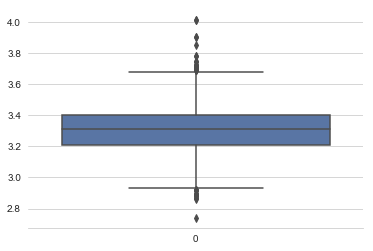

In [85]:
sns.set_style("whitegrid")
sns.boxplot(data=wine.pH, palette="deep")
sns.despine(left=True)

It seems for ph data in the wine, the mean is closed to 3.3, and it seems the data is quite symmetric either higher or lower than the mean. 

## Part 4 (FYI): Functional Magnetic Resonance Imagining
**NOTE:  The remainder of this notebook requires seaborn 0.9.0 (or newer) to provide the "relplot" capabilities**

![](resources/fmri.png)

In [75]:
fmri = sns.load_dataset("fmri")

In [76]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [77]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


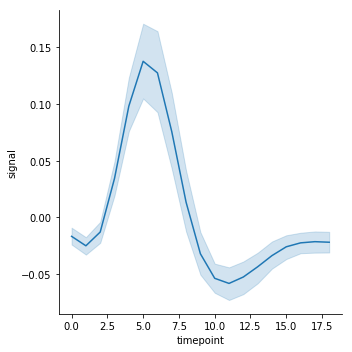

In [78]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

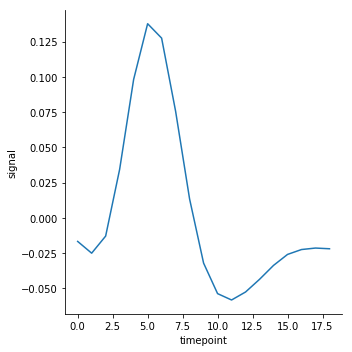

In [79]:
sns.relplot(x="timepoint", y="signal", kind="line", ci=None, data=fmri);

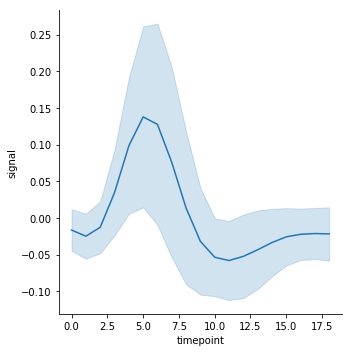

In [80]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd",data=fmri);

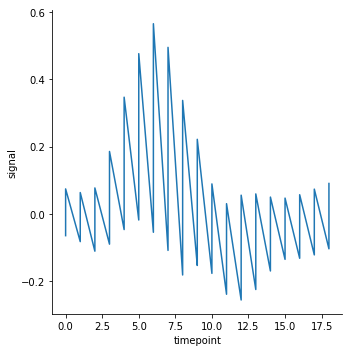

In [81]:
sns.relplot(x="timepoint", y="signal", kind="line", estimator=None, data=fmri);

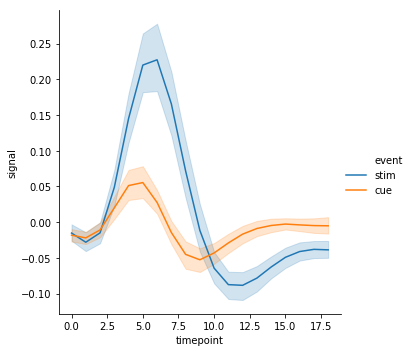

In [82]:
sns.relplot(x = "timepoint", y = "signal", kind = "line", data = fmri, hue = "event");

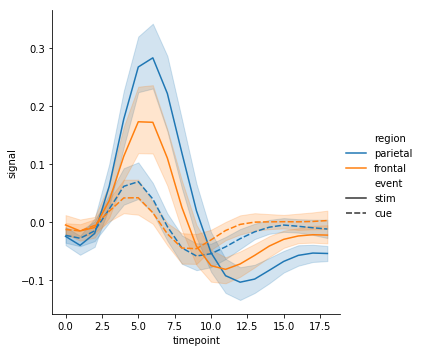

In [83]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri, hue="region", style="event");